## Deep learning model comparison for sentiment analysis :



Workflow 
Amazon review dataset

1. Data -- director, genre of the movie, actors
2. Data preprocessing -- cleaning of the data
3. Feature extraction -- convert textual data into feature vectors
4. Classification / sentiment analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



### Data download

In [2]:
train_df_actual = pd.read_csv('../data/amazon_review_polarity_csv/train.csv')
train_df_actual.columns = ["polarity","title", "text"]


In [3]:
train_df_actual.head(5)

,polarity,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [4]:
train_df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [5]:
test_df_actual = pd.read_csv('../data/amazon_review_polarity_csv/test.csv')
test_df_actual.columns = ["polarity","title", "text"]

In [6]:
test_df_actual.head(5)

,polarity,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [7]:
test_df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  399999 non-null  int64 
 1   title     399975 non-null  object
 2   text      399999 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


### Taking a chunk of train_df for experiments 

In [8]:
train_df = train_df_actual.iloc[:100000]
test_df = test_df_actual.iloc[:100000]
train_df

,polarity,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
99995,1,THE REAL SUPERMAN,THESE ARE THE REAL ADVENTURES OF THE REAL SUPE...
99996,1,It gets one star because zero was not an optio...,Sylvain Beauregard is WIDELY known to die-hard...
99997,1,Don't Spend Your Money,I think I now know more about the person who w...
99998,1,Enough already,"This is what you call ""overkill."" How many boo..."


In [9]:
train_df.isnull().sum()

polarity    0
title       5
text        0
dtype: int64

In [10]:
test_df.isnull().sum()

polarity    0
title       7
text        0
dtype: int64

In [11]:
train_df['title'] = train_df['title'].fillna('missing title')
test_df['title'] = test_df['title'].fillna('missing title')

/var/folders/x1/x8v6lhgd60n0tpmr5tz7t79c0000gn/T/ipykernel_51695/3838550985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['title'] = train_df['title'].fillna('missing title')
/var/folders/x1/x8v6lhgd60n0tpmr5tz7t79c0000gn/T/ipykernel_51695/3838550985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['title'] = test_df['title'].fillna('missing title')


In [12]:
train_df.isnull().sum()

polarity    0
title       0
text        0
dtype: int64

In [13]:
train_df['title']

0                    The best soundtrack ever to anything.
1                                                 Amazing!
2                                     Excellent Soundtrack
3        Remember, Pull Your Jaw Off The Floor After He...
4                                  an absolute masterpiece
                               ...                        
99995                                    THE REAL SUPERMAN
99996    It gets one star because zero was not an optio...
99997                               Don't Spend Your Money
99998                                       Enough already
99999                        Great book for the collectors
Name: title, Length: 100000, dtype: object

In [14]:
train_df['text']

0        I'm reading a lot of reviews saying that this ...
1        This soundtrack is my favorite music of all ti...
2        I truly like this soundtrack and I enjoy video...
3        If you've played the game, you know how divine...
4        I am quite sure any of you actually taking the...
                               ...                        
99995    THESE ARE THE REAL ADVENTURES OF THE REAL SUPE...
99996    Sylvain Beauregard is WIDELY known to die-hard...
99997    I think I now know more about the person who w...
99998    This is what you call "overkill." How many boo...
99999    Hi I think this is a great book for the collec...
Name: text, Length: 100000, dtype: object

### Data preprocessing

In [15]:
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


class DataPreprocess:
    def __init__(self, text_series):
        # Store the preprocessed data and tokenized sentences
        self.preproc_data = []
        
        # Apply the preprocessing steps
        for sentence in text_series:
            sentence = self.remove_numbers(sentence)
            sentence = self.text_lowercase(sentence)
            sentence = self.text_punctuation(sentence)
            sentence = self.remove_whitespace(sentence)
            sentence = self.remove_stopwords(sentence)
            sentence = self.lemmatizer(sentence)
            self.preproc_data.append(sentence)
        
        
    #### Lower case
    def text_lowercase(self, text):
        return text.lower()

    ### Remove punctuation
    def text_punctuation(self, text):
        return re.sub(r'[^\w\s]', '', text)
    
    ### Remove numbers
    def remove_numbers(self,text):
        return re.sub(r'\d+', '', text)


    #### Remove whitespace from text
    def remove_whitespace(self, text):
        return text.strip()

    # Remove stopwords function
    def remove_stopwords(self, text):
        stop_words = set(stopwords.words("english"))
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        return filtered_tokens  # Join back to a string

    # Lemmatization function
    def lemmatizer(self, text):
        wordnet_lemmatizer = WordNetLemmatizer()
        lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
        return lemm_text  # Join back to a string




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sireeshachamarthi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sireeshachamarthi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sireeshachamarthi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
train_df['content'] = train_df['title']+'. '+train_df['text']
test_df['content'] = test_df['title']+'. '+test_df['text']

/var/folders/x1/x8v6lhgd60n0tpmr5tz7t79c0000gn/T/ipykernel_51695/4096555068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['content'] = train_df['title']+'. '+train_df['text']
/var/folders/x1/x8v6lhgd60n0tpmr5tz7t79c0000gn/T/ipykernel_51695/4096555068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['content'] = test_df['title']+'. '+test_df['text']


In [17]:
type(train_df['content'][0])

str

In [18]:
# Preprocess the text data
train_proc = DataPreprocess(train_df['content'])
test_proc = DataPreprocess(test_df['content'])

In [19]:
train_proc.preproc_data


[['best',
  'soundtrack',
  'ever',
  'anything',
  'im',
  'reading',
  'lot',
  'review',
  'saying',
  'best',
  'game',
  'soundtrack',
  'figured',
  'id',
  'write',
  'review',
  'disagree',
  'bit',
  'opinino',
  'yasunori',
  'mitsudas',
  'ultimate',
  'masterpiece',
  'music',
  'timeless',
  'im',
  'listening',
  'year',
  'beauty',
  'simply',
  'refuse',
  'fadethe',
  'price',
  'tag',
  'pretty',
  'staggering',
  'must',
  'say',
  'going',
  'buy',
  'cd',
  'much',
  'money',
  'one',
  'feel',
  'would',
  'worth',
  'every',
  'penny'],
 ['amazing',
  'soundtrack',
  'favorite',
  'music',
  'time',
  'hand',
  'intense',
  'sadness',
  'prisoner',
  'fate',
  'mean',
  'youve',
  'played',
  'game',
  'hope',
  'distant',
  'promise',
  'girl',
  'stole',
  'star',
  'important',
  'inspiration',
  'personally',
  'throughout',
  'teen',
  'year',
  'higher',
  'energy',
  'track',
  'like',
  'chrono',
  'cross',
  'time',
  'scar',
  'time',
  'dreamwatch',
  

In [20]:
train_df['polarity'] 

0        2
1        2
2        2
3        2
4        2
        ..
99995    1
99996    1
99997    1
99998    1
99999    2
Name: polarity, Length: 100000, dtype: int64

In [88]:
train_df['polarity']  = train_df['polarity'] .replace(2, 0)
test_df['polarity']  = test_df['polarity'] .replace(2, 0)

/var/folders/x1/x8v6lhgd60n0tpmr5tz7t79c0000gn/T/ipykernel_51695/1076303425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['polarity']  = train_df['polarity'] .replace(2, 0)
/var/folders/x1/x8v6lhgd60n0tpmr5tz7t79c0000gn/T/ipykernel_51695/1076303425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['polarity']  = test_df['polarity'] .replace(2, 0)


In [89]:
from sklearn.model_selection import train_test_split

X = train_proc.preproc_data
y = train_df['polarity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
print(len(X_train), len(X_test))

80000 20000


In [91]:
X_train

[['missing',
  'song',
  'found',
  'previous',
  'reviewer',
  'disappointed',
  'find',
  'wont',
  'long',
  'believe',
  'actually',
  'two',
  'version',
  'cd',
  'version',
  'two',
  'song',
  'omits',
  'drive',
  'car',
  'try',
  'find',
  'copy',
  'version',
  'two',
  'great',
  'version',
  'performed',
  'live'],
 ['great',
  'movie',
  'never',
  'saw',
  'movie',
  'prior',
  'watching',
  'version',
  'say',
  'amazing',
  'movie',
  'loved',
  'fact',
  'movie',
  'looked',
  'american',
  'japanese',
  'version',
  'war',
  'movie',
  'seen',
  'war',
  'definitely',
  'one',
  'intriguing',
  'eyeopening',
  'film',
  'made',
  'truly',
  'consider',
  'side',
  'war',
  'lover',
  'history',
  'movie',
  'amazing',
  'love',
  'history',
  'considering',
  'different',
  'point',
  'view',
  'amazing',
  'movie',
  'want',
  'miss',
  'also',
  'loved',
  'special',
  'feature',
  'bluray',
  'especially',
  'extra',
  'minute',
  'get',
  'film',
  'amazing'],
 

### Embedding layer

#### Tokenizer - keras

word_tokenize -- splits the sentence into different individual words (ref: stop words func above)

Tokenzier - converts words to individual tokens

- Tokenizer().fit_on_texts(text_list): The tokenizer builds a vocabulary based on the training data.
- texts_to_sequences(text_list): This converts each sentence (list of words) into a list of integers, where each integer corresponds to the index of a word in the vocabulary.


- xword_tokenizer.fit_on_texts(X_train), the tokenizer learns the vocabulary (i.e., the unique words) from the training data. It assigns an integer index to each word based on its frequency in the training data.

- After fitting the tokenizer on the training data, you can convert the texts in both the training and test datasets into sequences of integers using texts_to_sequences.


- The tokenizer should be fitted only on the training data because your model should not learn or adapt to the test data during training. The test data is supposed to be a proxy for unseen data in the real world, so it should only be transformed using the vocabulary learned from the training data.

- Training Data (X_train): The tokenizer learns the vocabulary from the training data.
- Test Data (X_test): The tokenizer uses the same vocabulary and mapping learned from the training data to convert the test data into sequences.




### Example : 

Sentences : 
[
    "I love machine learning",
    "Machine learning is great",
    "I love coding",
    "Coding and learning are fun"
]

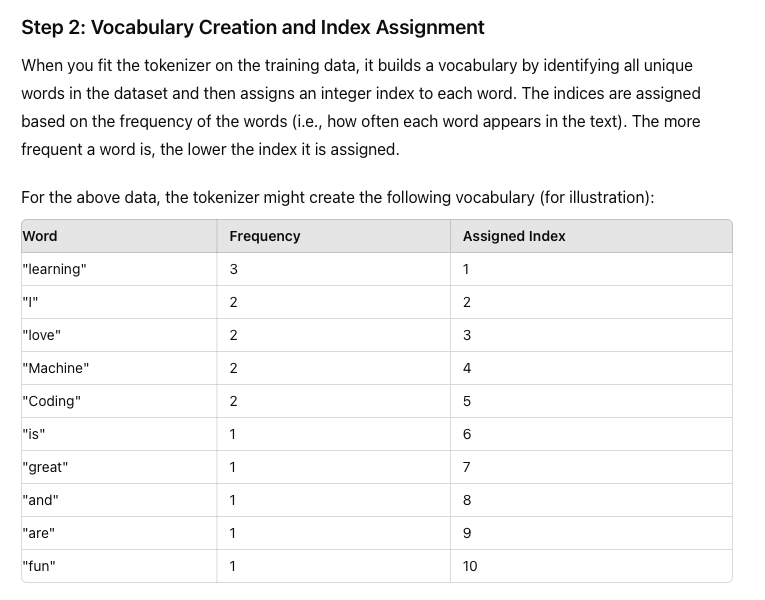




- The word "learning" appears 3 times across all sentences, so it gets the index 1 (the most frequent word usually gets the smallest index).
- The word "I" appears 2 times, so it gets the index 2.
- The word "love" also appears 2 times, so it gets the index 3.
- Other words are assigned indices based on their frequency as well.


Output_sequences = [
    [2, 3, 1, 4],      # "I love machine learning"
    [4, 1, 6, 7],      # "Machine learning is great"
    [2, 3, 5],         # "I love coding"
    [5, 8, 1, 9, 10]   # "Coding and learning are fun"
]


In [92]:
#### Step 1. Convert words to numeric form (tokens)

from tensorflow.keras.preprocessing.text import Tokenizer

keras_word_tokenizer = Tokenizer()
keras_word_tokenizer.fit_on_texts(X_train)



In [93]:
X_train = keras_word_tokenizer.texts_to_sequences(X_train)
X_test = keras_word_tokenizer.texts_to_sequences(X_test)

In [94]:
X_train

[[471,
  29,
  78,
  498,
  397,
  134,
  61,
  218,
  90,
  197,
  139,
  56,
  84,
  25,
  84,
  56,
  29,
  14458,
  575,
  436,
  147,
  61,
  254,
  84,
  56,
  6,
  84,
  2381,
  234],
 [6,
  3,
  46,
  219,
  3,
  1969,
  235,
  84,
  48,
  226,
  3,
  146,
  172,
  3,
  511,
  310,
  1581,
  84,
  343,
  3,
  141,
  343,
  255,
  2,
  1925,
  9080,
  23,
  55,
  309,
  882,
  306,
  343,
  924,
  253,
  3,
  226,
  13,
  253,
  1088,
  123,
  162,
  450,
  226,
  3,
  44,
  579,
  34,
  146,
  274,
  352,
  730,
  257,
  390,
  201,
  10,
  23,
  226],
 [5811,
  100,
  41,
  402,
  3248,
  28873,
  1,
  5,
  191,
  37,
  100,
  3339,
  22,
  60,
  2119,
  2694,
  66,
  2533,
  119,
  6267,
  275,
  3148,
  658,
  16,
  769,
  28874,
  963,
  50098,
  3148,
  1949,
  2533,
  119],
 [6,
  13747,
  20111,
  1232,
  50099,
  1,
  283,
  227,
  1,
  6,
  2584,
  57,
  417,
  112,
  2279,
  548,
  20111,
  13747,
  1232,
  139,
  2381,
  6,
  40,
  29,
  83,
  296,
  50100,
  196,
  

### Unique words in the training corpus

In [95]:
vocab_size = len(keras_word_tokenizer.word_index) +1
vocab_size

141016

#### padding

In [96]:
#Max Sequence Length
len_seq = list()
for i in range(0,len(X_train)):
    len_seq.append(len(X_train[i]))
max_len_seq = max(len_seq)

max_len_seq

141

In [97]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Converting train & test into sequence
train_seq = pad_sequences(X_train,maxlen = max_len_seq,padding = 'pre',truncating='post')
test_seq = pad_sequences(X_test,maxlen = max_len_seq,padding = 'pre',truncating='post')

In [98]:
train_seq

array([[    0,     0,     0, ...,    84,  2381,   234],
       [    0,     0,     0, ...,    10,    23,   226],
       [    0,     0,     0, ...,  1949,  2533,   119],
       ...,
       [    0,     0,     0, ...,  3225,    82, 28478],
       [    0,     0,     0, ..., 50077,   881,     8],
       [    0,     0,     0, ...,  4733,   372,    62]], dtype=int32)

In [99]:
X_train[0]

[471,
 29,
 78,
 498,
 397,
 134,
 61,
 218,
 90,
 197,
 139,
 56,
 84,
 25,
 84,
 56,
 29,
 14458,
 575,
 436,
 147,
 61,
 254,
 84,
 56,
 6,
 84,
 2381,
 234]

In [100]:
len(X_train[0])

29

zeros are appended to the beginning of the seq for the X_train values --- the end of the values in train_seq are same as X_train original- ---- pre padding

In [101]:
train_seq.shape

(80000, 141)

 ### Glove embeddings

 - GloVe embeddings are useful when you want to start with high-quality, pre-trained embeddings that capture semantic meaning. This is especially helpful when you don't have a large corpus to train embeddings from scratch.

 -  based on matrix factorization of the word co-occurrence matrix (wheras for Word2Vec it is predicting contexts). GloVe captures the global statistical information about the corpus, such as how frequently words co-occur.

 - "The cat sat on the mat."

GloVe builds a large matrix where rows represent words, and columns represent contexts (other words). Each cell in this matrix captures how often a word appears in the context of another word (e.g., how often "cat" appears near "mat"). GloVe then factorizes this matrix into two smaller matrices, which are multiplied together to create word vectors that capture the semantics of the original matrix.

For instance, if "cat" and "dog" frequently appear in similar contexts (like "bark" or "pet"), GloVe will produce similar vectors for "cat" and "dog."
 
 - If you're working on a text classification task and want to use pre-trained word embeddings, you can use GloVe embeddings. 

 -  use GloVe embeddings to convert words in the articles into vectors and feed them into a neural network. GloVe embeddings might already know that "president," "election," and "government" are related, which can improve your model's accuracy without needing as much training data.



 - GloVe Embeddings: GloVe (Global Vectors for Word Representation) provides pre-trained word embeddings, where each word is represented as a vector in a high-dimensional space. Commonly used GloVe embeddings have dimensionalities like 50, 100, 200, or 300, meaning each word is represented by a vector of 50, 100, 200, or 300 real numbers. 
 -  in this file it is 100 embeddings


In [102]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('../data/a2_glove.6B.100d.txt', encoding="utf8") ## file - word followed by embedding vector pretrained

for line in glove_file:
     ## Store word as key and corresponding embedding vector as value from the above file
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions 
glove_file.close()



# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_size, 100))     ## matrix is initialized with zeros

## For our specific vocabulary (keras_word_tokenizer.word_index), we create an embedding matrix.
for word, index in keras_word_tokenizer.word_index.items():

    ## each word in your vocabulary, if the word exists in the GloVe embeddings dictionary, you replace the row in the matrix corresponding to that word's index with its embedding vector.
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

- Loading GloVe: You load a pre-trained GloVe file, where each line contains a word followed by its embedding vector.
- Creating Embeddings Dictionary: Each word from the GloVe file is stored in a dictionary with the word as the key and its corresponding embedding vector as the value.
- Creating Embedding Matrix: For your specific vocabulary (word_tokenizer.word_index), you create an embedding matrix. 
- This matrix is initialized with zeros, and then for each word in your vocabulary, if the word exists in the GloVe embeddings dictionary, you replace the row in the matrix corresponding to that word's index with its embedding vector.

- Usage: This embedding matrix is typically used as an embedding layer in a neural network model. The GloVe embeddings are static, meaning the embeddings do not change during training.

In [103]:
embedding_matrix.shape  ## vocab size and 100 columns

(141016, 100)

embedding matrix where each row corresponds to a word from our vocabulary, and the row contains the GloVe embedding for that word.

#### Neural Network

In [104]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten
from keras.layers import Input, Embedding

In [105]:
model_nn = Sequential()
model_nn.add(Input(shape=(max_len_seq,))) ## shape of input data
model_nn.add(Embedding(input_dim=vocab_size,output_dim=100,weights=[embedding_matrix],trainable=False))
model_nn.add(Dropout(0.2))
model_nn.add(Flatten())
model_nn.add(Dense(10,activation='relu'))
model_nn.add(Dense(1,activation='sigmoid'))

In [106]:
model_nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [107]:
model_nn.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 141, 100)       │    14,101,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 141, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14100)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │       141,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,242,621 (54.33 MB)

 Trainable params: 141,021 (550.86 KB)

 Non-trainable params: 14,101,600 (53.79 MB)

### Model training

In [108]:
model_nn_history = model_nn.fit(train_seq,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.6788 - loss: 0.5901 - val_acc: 0.7623 - val_loss: 0.4950
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7771 - loss: 0.4715 - val_acc: 0.7744 - val_loss: 0.4778
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7901 - loss: 0.4456 - val_acc: 0.7713 - val_loss: 0.4782
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7976 - loss: 0.4361 - val_acc: 0.7692 - val_loss: 0.4791
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8045 - loss: 0.4214 - val_acc: 0.7711 - val_loss: 0.4802
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8067 - loss: 0.4149 - val_acc: 0.7668 - val_loss: 0.4884
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8135 - loss: 0.4039 - val_acc: 0.7679 - val_loss: 0.4895
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.8185 - loss: 0.3991 - val_acc: 0.7685 - val_loss: 0.4893
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - ac

In [112]:
model_nn_score = model_nn.evaluate(test_seq,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - acc: 0.7631 - loss: 0.4955


In [113]:
print('Test loss',model_nn_score[0])

Test loss 0.4984685182571411


In [114]:
print('Test acc',model_nn_score[1])

Test acc 0.7626500129699707


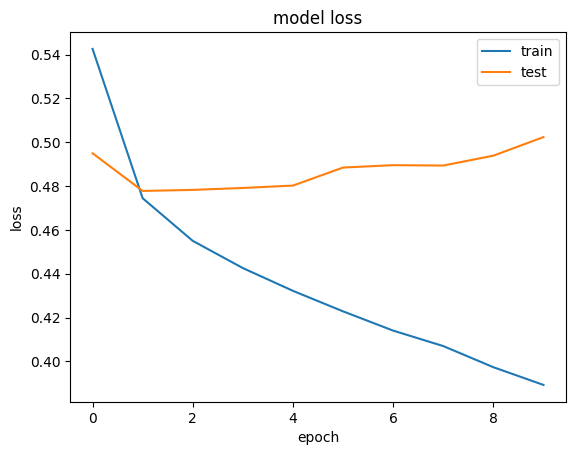

In [117]:
plt.plot(model_nn_history.history['loss'])
plt.plot(model_nn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

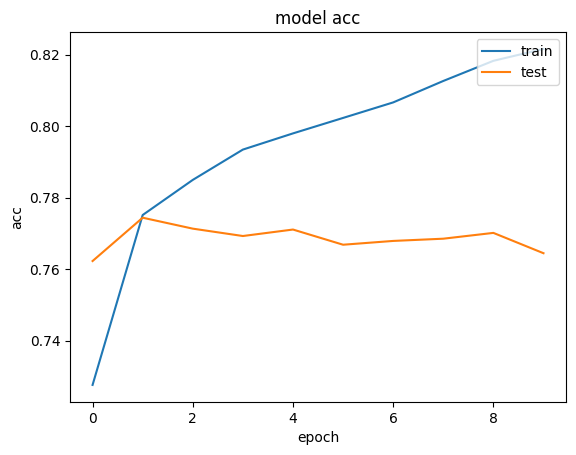

In [118]:
plt.plot(model_nn_history.history['acc'])
plt.plot(model_nn_history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

### Overfitting

Training accuracy is higher than Test accuracy - model is overfitting

#### CNN - 1D CNN for text data

In [130]:
from keras.layers import Conv1D,GlobalMaxPool1D  

model_cnn = Sequential()
model_cnn.add(Input(shape=(max_len_seq,)))
model_cnn.add(Embedding(input_dim=vocab_size,output_dim=100,weights=[embedding_matrix],trainable=False))
model_cnn.add(Conv1D(128,5,activation='relu'))
model_cnn.add(GlobalMaxPool1D())
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(10,activation='relu'))
model_cnn.add(Dense(1,activation='sigmoid'))

In [131]:
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model_cnn.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 141, 100)       │    14,101,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 137, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,167,029 (54.04 MB)

 Trainable params: 65,429 (255.58 KB)

 Non-trainable params: 14,101,600 (53.79 MB)

In [132]:
model_cnn_history = model_cnn.fit(train_seq,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.7088 - loss: 0.5447 - val_acc: 0.8326 - val_loss: 0.3704
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.8453 - loss: 0.3492 - val_acc: 0.8493 - val_loss: 0.3425
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.8675 - loss: 0.3085 - val_acc: 0.8527 - val_loss: 0.3321
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - acc: 0.8805 - loss: 0.2801 - val_acc: 0.8524 - val_loss: 0.3360
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.8944 - loss: 0.2561 - val_acc: 0.8524 - val_loss: 0.3437
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - acc: 0.9058 - loss: 0.2311 - val_acc: 0.8556 - val_loss: 0.3390
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - acc: 0.9134 - loss: 0.2129 - val_acc: 0.8523 - val_loss: 0.3535
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - acc: 0.9218 - loss: 0.1943 - val_acc: 0.8549 - val_loss: 0.3561
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/

In [142]:
model_cnn_score = model_cnn.evaluate(test_seq,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8337 - loss: 0.4376


In [143]:
print('Test loss',model_cnn_score[0])

Test loss 0.42484796047210693


In [144]:
print('Test acc',model_cnn_score[1])

Test acc 0.8389000296592712


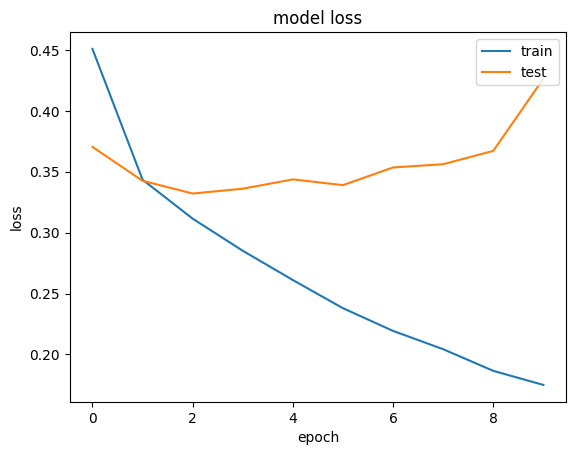

In [145]:
plt.plot(model_cnn_history.history['loss'])
plt.plot(model_cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

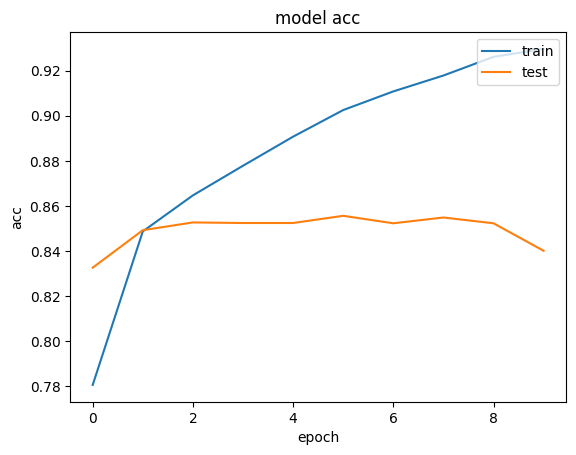

In [146]:
plt.plot(model_cnn_history.history['acc'])
plt.plot(model_cnn_history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

##### Test accuracy has improved but CNN Model is overfitting

### RNN 

In [139]:
from keras.layers import SimpleRNN

model_rnn = Sequential()
model_rnn.add(Input(shape=(max_len_seq,)))
model_rnn.add(Embedding(input_dim=vocab_size,output_dim=100,weights=[embedding_matrix],trainable=False))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(10,activation='relu'))
model_rnn.add(Dense(1,activation='sigmoid'))

In [140]:
model_rnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [141]:
model_rnn.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 141, 100)       │    14,101,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,132,213 (53.91 MB)

 Trainable params: 30,613 (119.58 KB)

 Non-trainable params: 14,101,600 (53.79 MB)

In [151]:
model_rnn_history = model_rnn.fit(train_seq,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - acc: 0.6523 - loss: 0.6220 - val_acc: 0.6356 - val_loss: 0.6326
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - acc: 0.7179 - loss: 0.5616 - val_acc: 0.5862 - val_loss: 0.6632
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - acc: 0.6451 - loss: 0.6246 - val_acc: 0.7466 - val_loss: 0.5238
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - acc: 0.7504 - loss: 0.5214 - val_acc: 0.7105 - val_loss: 0.5675
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - acc: 0.7176 - loss: 0.5624 - val_acc: 0.7791 - val_loss: 0.4935
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - acc: 0.7766 - loss: 0.4874 - val_acc: 0.7947 - val_loss: 0.4703
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - acc: 0.7784 - loss: 0.4821 - val_acc: 0.7753 - val_loss: 0.4819
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - acc: 0.6631 - loss: 0.6064 - val_acc: 0.6929 - val_loss: 0.6101
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 

In [152]:
model_rnn_score = model_rnn.evaluate(test_seq,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.5087 - loss: 0.7041


In [153]:
print('Test loss',model_rnn_score[0])

Test loss 0.7068196535110474


In [154]:
print('Test acc',model_rnn_score[1])

Test acc 0.5052000284194946


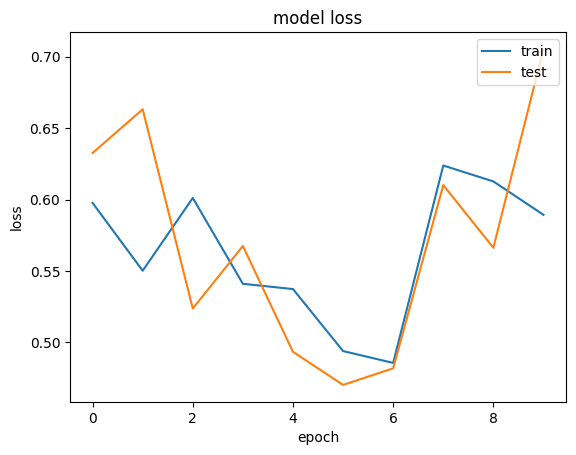

In [155]:
plt.plot(model_rnn_history.history['loss'])
plt.plot(model_rnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

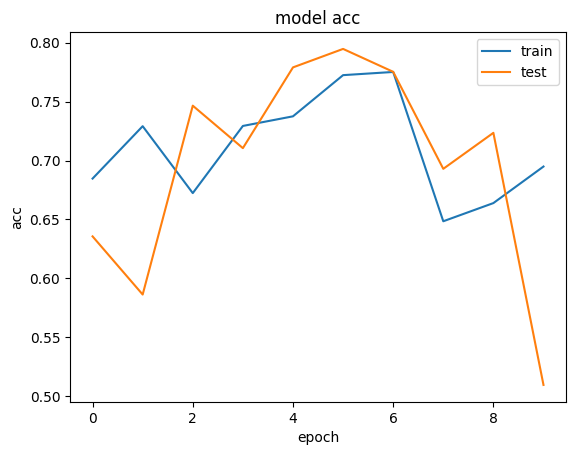

In [156]:
plt.plot(model_rnn_history.history['acc'])
plt.plot(model_rnn_history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

Early stopping needs to be implemented

In [171]:
from keras.layers import SimpleRNN

model_rnn = Sequential()
model_rnn.add(Input(shape=(max_len_seq,)))
model_rnn.add(Embedding(input_dim=vocab_size,output_dim=100,weights=[embedding_matrix],trainable=False))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(10,activation='relu'))
model_rnn.add(Dense(1,activation='sigmoid'))

In [172]:
model_rnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [173]:
model_rnn.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 141, 100)       │    14,101,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 128)            │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,132,213 (53.91 MB)

 Trainable params: 30,613 (119.58 KB)

 Non-trainable params: 14,101,600 (53.79 MB)

In [174]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc',patience=3,restore_best_weights=True)

model_rnn_ES_history = model_rnn.fit(train_seq,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - acc: 0.6419 - loss: 0.6289 - val_acc: 0.5404 - val_loss: 0.6800
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - acc: 0.6308 - loss: 0.6303 - val_acc: 0.6057 - val_loss: 0.6548
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - acc: 0.6290 - loss: 0.6381 - val_acc: 0.7398 - val_loss: 0.5322
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - acc: 0.7083 - loss: 0.5665 - val_acc: 0.6206 - val_loss: 0.6469
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - acc: 0.6459 - loss: 0.6280 - val_acc: 0.7380 - val_loss: 0.5462
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - acc: 0.7404 - loss: 0.5411 - val_acc: 0.5565 - val_loss: 0.6817


In [175]:
model_rnn_ES_score = model_rnn.evaluate(test_seq,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.7419 - loss: 0.5297


In [176]:
print('Test loss',model_rnn_ES_score[0])

Test loss 0.5274381041526794


In [177]:
print('Test acc',model_rnn_ES_score[1])

Test acc 0.7458500266075134


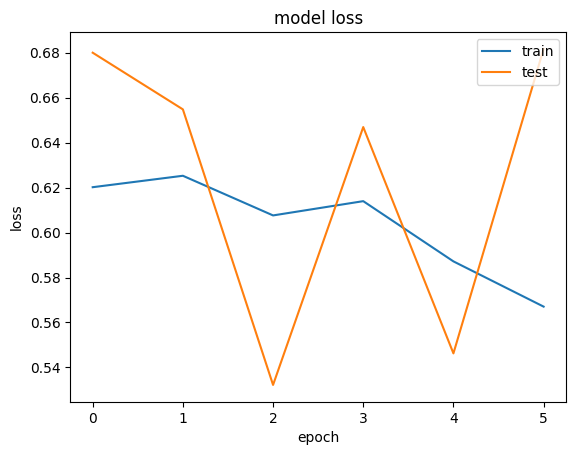

In [178]:
plt.plot(model_rnn_ES_history.history['loss'])
plt.plot(model_rnn_ES_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

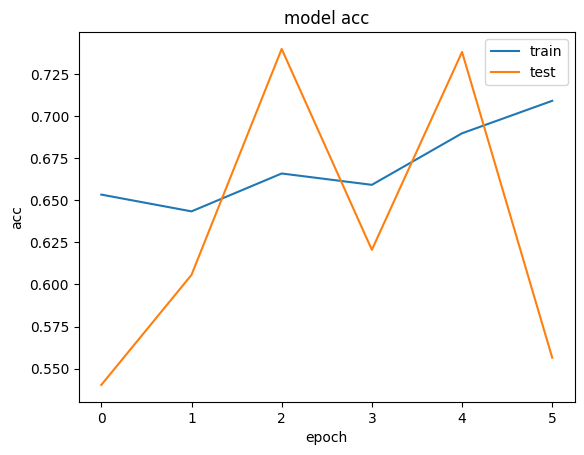

In [179]:
plt.plot(model_rnn_ES_history.history['acc'])
plt.plot(model_rnn_ES_history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

#### LSTM

In [157]:
from keras.layers import LSTM

model_LSTM = Sequential()
model_LSTM.add(Input(shape=(max_len_seq,)))
model_LSTM.add(Embedding(input_dim=vocab_size,output_dim=100,weights=[embedding_matrix],trainable=False))
model_LSTM.add(LSTM(128))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(10,activation='relu'))
model_LSTM.add(Dense(1,activation='sigmoid'))

In [158]:
model_LSTM.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [159]:
model_LSTM.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 141, 100)       │    14,101,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,220,149 (54.25 MB)

 Trainable params: 118,549 (463.08 KB)

 Non-trainable params: 14,101,600 (53.79 MB)

In [160]:
model_LSTM_history = model_LSTM.fit(train_seq,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 162ms/step - acc: 0.7509 - loss: 0.5047 - val_acc: 0.8349 - val_loss: 0.3686
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 155ms/step - acc: 0.8399 - loss: 0.3616 - val_acc: 0.8573 - val_loss: 0.3309
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 79s 158ms/step - acc: 0.8609 - loss: 0.3191 - val_acc: 0.8634 - val_loss: 0.3154
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 72s 143ms/step - acc: 0.8728 - loss: 0.2950 - val_acc: 0.8721 - val_loss: 0.3038
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 139ms/step - acc: 0.8835 - loss: 0.2766 - val_acc: 0.8714 - val_loss: 0.3002
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 76s 151ms/step - acc: 0.8913 - loss: 0.2600 - val_acc: 0.8757 - val_loss: 0.2966
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 153ms/step - acc: 0.9021 - loss: 0.2405 - val_acc: 0.8744 - val_loss: 0.3003
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 150ms/step - acc: 0.9066 - loss: 0.2265 - val_acc: 0.8754 - val_loss: 0.3033
Epoch 9/10
500/500 ━━━━━━━━━━━━━

In [161]:
model_LSTM_score = model_LSTM.evaluate(test_seq,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - acc: 0.8757 - loss: 0.3096


In [162]:
print('Test loss',model_LSTM_score[0])

Test loss 0.3038181960582733


In [163]:
print('Test acc',model_LSTM_score[1])

Test acc 0.8791000247001648


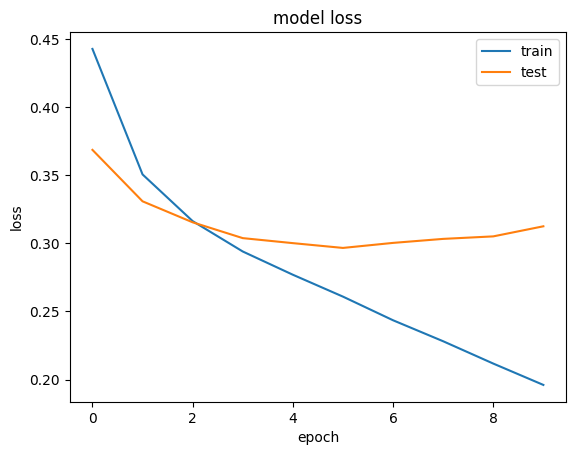

In [164]:
plt.plot(model_LSTM_history.history['loss'])
plt.plot(model_LSTM_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

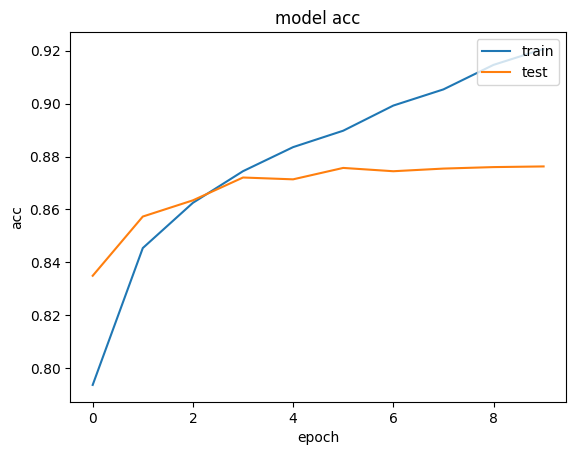

In [165]:
plt.plot(model_LSTM_history.history['acc'])
plt.plot(model_LSTM_history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [ ]:
# model_LSTM.save(f'../model/TC_lstm_{round(model_LSTM_score[1],3)}.h5',save_format = 'h5')

In [180]:
test_sample1 = 'the book is amazing and has a great stuff about the good things'
test_sample2 = 'the movie is bad and does not have anything worth'
test_sample3 = 'it is alright and I am ok with it'  ### can be perceived as postive ?

In [196]:
df_test_sample = pd.DataFrame({'content':['the book is amazing and has a great stuff about the good things','the movie is bad and does not have anything worth','it is alright and I am ok with it'],
                               'polarity':[0,1,1]})
df_test_sample

,content,polarity
0,the book is amazing and has a great stuff abou...,0
1,the movie is bad and does not have anything worth,1
2,it is alright and I am ok with it,1


In [188]:
ts_1 = DataPreprocess(df_test_sample['content'])

In [189]:
ts_1.preproc_data

[['book', 'amazing', 'great', 'stuff', 'good', 'thing'],
 ['movie', 'bad', 'anything', 'worth'],
 ['alright', 'ok']]

In [190]:
ts1_tokenized = keras_word_tokenizer.texts_to_sequences(ts_1.preproc_data)
ts1_tokenized

[[1, 226, 6, 290, 5, 32], [3, 45, 163, 85], [2435, 312]]

In [191]:
ts1_padded = pad_sequences(ts1_tokenized,padding='pre',truncating='post',maxlen=max_len_seq)

In [192]:
ts1_padded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,  226,    6,  290,    5,   32],
       [   0,    0,    0,    0,    0,    0,    0,

In [193]:
ts1_pred = model_LSTM.predict(ts1_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [194]:
ts1_pred

array([[0.01775197],
       [0.91048557],
       [0.7929141 ]], dtype=float32)

In [198]:
df_test_sample['polarity'] ### Actual

0    0
1    1
2    1
Name: polarity, dtype: int64

In [197]:
np.round(ts1_pred) ## Predicted

array([[0.],
       [1.],
       [1.]], dtype=float32)

Ref : 
https://github.com/skillcate/sentiment-analysis-with-deep-neural-networks/blob/main/b1_SentimentAnalysis_with_NeuralNetwork.ipynb

